# Projeto de Estudo - Machine Learning <n>
- Árvore de Regressão
- Regressão Linear

## Bibliotecas
Pandas <n>

Datetime

Matplotlib

Sklearn.Linear




# Analisando as vendas da empresa
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Essa é uma base de dados real, porém anonimizada
- Fizemos alguns tratamentos nos dados e disponibilizamos em 3 arquivos:
    - `base_vendas.xlsx`: todos os dados de venda por item da empresa, onde cada linha representa 1 item vendido
    - `base_pagamentos.xlsx`: base com as formas de pagamento usado naquela compra
    - `olist_order_reviews_dataset.csv`: base com o review dos pedidos, exatamente como baixada do Kaggle, onde cada linha representa a avaliação de uma pedido
- Uma base extra com o agrupamento das categorias também está disponível em `verifica_base.xlsx`

## Importando a base

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importando a base de vendas do excel
vendas = pd.read_excel('base_vendas.xlsx')

In [ ]:
# Importando a base de grupos
grupos = pd.read_excel('verifica_base.xlsx')

In [ ]:
# Podemos unir essas duas bases utilizando o merge
vendas = pd.merge(
    vendas,
    grupos,
    how='left',
    left_on = 'product_category_name', right_on = 'categoria'
)

In [ ]:
# E também apagar as colunas que não estamos usando
vendas = vendas.drop(['product_category_name','categoria'],axis=1)

In [ ]:
# Verificando as informações da tabela
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111923 entries, 0 to 111922
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111923 non-null  object        
 1   customer_id                    111923 non-null  object        
 2   order_status                   111923 non-null  object        
 3   order_purchase_timestamp       111923 non-null  datetime64[ns]
 4   order_approved_at              111808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110050 non-null  datetime64[ns]
 6   order_delivered_customer_date  108804 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111923 non-null  datetime64[ns]
 8   order_item_id                  111206 non-null  float64       
 9   product_id                     111206 non-null  object        
 10  seller_id                      111206 non-null  object        
 11  

### Tratando valores vazios e outliers

In [ ]:
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 115
order_delivered_carrier_date     1873
order_delivered_customer_date    3119
order_estimated_delivery_date       0
order_item_id                     717
product_id                        717
seller_id                         717
shipping_limit_date               717
price                             717
freight_value                     717
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                            2315
dtype: int64

**Retirando valores nulos das vendas**

In [ ]:
# Retirando os valores onde o preço é vazio
vendas = vendas[vendas.price.notnull()]

**Desconsiderando as vendas canceladas**

In [ ]:
# Retirando as vendas que foram canceladas
vendas = vendas[vendas.order_status != 'canceled']

**Retirando os outliers das datas**

In [ ]:
# Retirando a black friday
import datetime as dt
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,24)]

In [ ]:
# Retirando o dia após a black friday
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,25)]

**Atualizando categorias vazias como outros**

In [ ]:
# Substituindo valores vazios no grupo por nulo
vendas.loc[vendas.grupo.isnull(),'grupo'] = 'outros'

**Verificando valores vazios**

In [ ]:
# Contando quantos valores vazios existem em cada coluna
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      688
order_delivered_customer_date    1845
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                               0
dtype: int64

In [ ]:
# Entendendo as 15 colunas com order_approved_at vazias
vendas[vendas.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
5909,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18,NaT,2017-02-23,2017-03-01,2017-03-17,1.0,0e20a07ca1714df21f9b07ca3bf7c682,...,309.90,39.11,8a9a08c7ca8900a200d83cf838a07e0b,cotia,SP,18,2,2017,2017-02,eletro_eletronicos
18599,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-21,1.0,2c2b6a28924791234bd386bddb17512e,...,379.00,17.86,91efb7fcabc17925099dced52435837f,novo hamburgo,RS,18,2,2017,2017-02,construção
21347,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18,NaT,2017-02-22,2017-03-01,2017-03-17,1.0,583916a5dae918f5e89baec139141c54,...,49.99,15.53,e1f01a1bd6485e58ad3c769a5427d8a8,sao paulo,SP,18,2,2017,2017-02,outros
25425,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18,NaT,2017-02-22,2017-03-09,2017-03-31,1.0,c6dd917a0be2a704582055949915ab32,...,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,caninde,CE,18,2,2017,2017-02,outros
25982,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17,NaT,2017-02-22,2017-03-02,2017-03-20,1.0,c6dd917a0be2a704582055949915ab32,...,79.99,15.77,c8822fce1d0bfa7ddf0da24fff947172,macae,RJ,17,2,2017,2017-02,outros
30111,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19,NaT,2017-01-25,2017-01-30,2017-03-01,1.0,5ab02ca028398131a5ae91401eb49788,...,39.99,14.52,6ff8b0d7b35d5c945633b8d60165691b,santos,SP,19,1,2017,2017-01,esporte
43022,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19,NaT,2017-02-23,2017-03-02,2017-03-27,1.0,cae2e38942c8489d9d7a87a3f525c06b,...,149.80,13.63,2e0a2166aa23da2472c6a60c4af6f7a6,sao paulo,SP,19,2,2017,2017-02,casa
44195,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-22,1.0,02a79d79e818ad0be36cfc843a6af7ad,...,28.99,10.96,c4c0011e639bdbcf26059ddc38bd3c18,varzea paulista,SP,18,2,2017,2017-02,esporte
54379,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19,NaT,2017-01-27,2017-02-06,2017-03-16,1.0,c3b271f47e73d0c9ccf1b43b7606c705,...,45.90,14.52,d49f3dae6bad25d05160fc17aca5942d,conselheiro lafaiete,MG,19,1,2017,2017-01,casa
69318,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17,NaT,2017-02-22,2017-03-03,2017-03-20,1.0,4fd676d9c4723d475026e40aeae56957,...,135.00,19.23,5a4fa4919cbf2b049e72be460a380e5b,abaete,MG,17,2,2017,2017-02,construção


In [ ]:
# Apagando essas colunas
vendas = vendas.drop('order_approved_at',axis=1)

**Verificando os outliers**

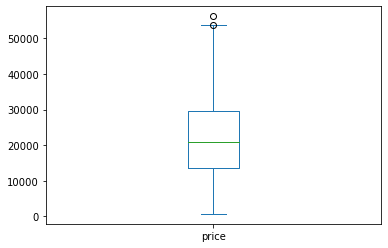

In [ ]:
# Criando um boxplot
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box();

# Qual pergunta eu quero responder?

### <font color='blue'>Qual vai ser a venda valor nos próximos dias?</font>

In [ ]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


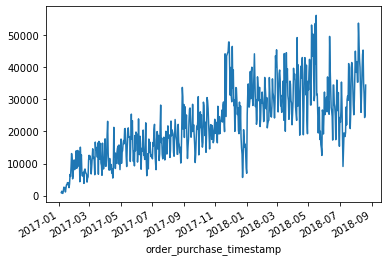

In [ ]:
# Visualizando a venda pelo tempo
vendas.groupby('order_purchase_timestamp')['price'].sum().plot();

In [ ]:
# Importando o matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Podemos criar uma nova variável para a venda por dia
venda_vlr = vendas.groupby('order_purchase_timestamp')['price'].sum()

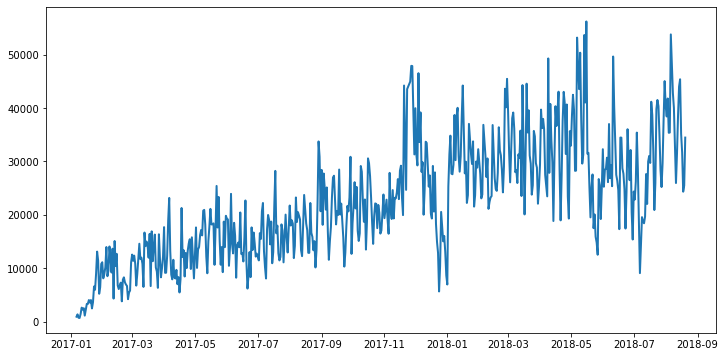

In [ ]:
# E então traçar o gráfico dessa variável
fig, ax = plt.subplots(figsize=(12,6))

x = venda_vlr.index
y = venda_vlr.values

ax.plot(x, y, linewidth=2.0)

plt.show()

In [ ]:
venda_vlr.index[-1]

Timestamp('2018-08-20 00:00:00')

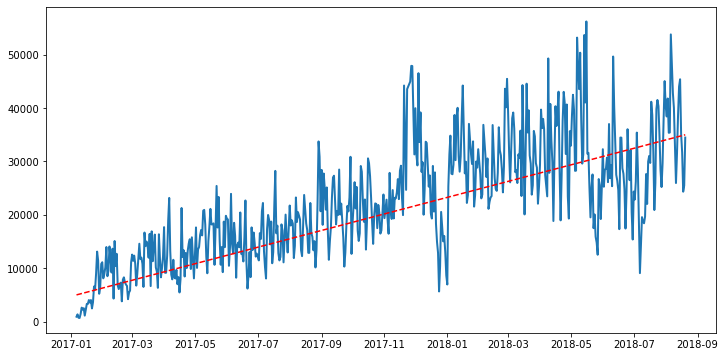

In [ ]:
# Eu posso traçar uma reta qualquer para estimar a venda

fig, ax = plt.subplots(figsize=(12,6))

x = venda_vlr.index
y = venda_vlr.values

ax.plot(x, y, linewidth=2.0)

x_reta = [venda_vlr.index[0],venda_vlr.index[-1]]
y_reta = [5000,35000]

ax.plot(x_reta, y_reta,'--r')

plt.show()

## Qual é a melhor forma de traçar essa reta?
- Utilizando a regressão linear do Scikit-Learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Ajustando a venda_vlr como um DataFrame
venda_vlr = venda_vlr.reset_index()
venda_vlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  590 non-null    datetime64[ns]
 1   price                     590 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [ ]:
# Antes de usar o Scikit-Learn, vamos tratar a data para conseguir colocar no modelo
# Importando o datetime
import datetime as dt

In [ ]:
venda_vlr.tail(3)

,order_purchase_timestamp,price
587,2018-08-18,24340.95
588,2018-08-19,25487.39
589,2018-08-20,34479.50


In [ ]:
# Fazendo a diferença entre o dia atual e o menor dia
venda_vlr['ajuste_data'] = (venda_vlr.order_purchase_timestamp - venda_vlr.order_purchase_timestamp.min()).dt.days

In [ ]:
# Colocando esses valores em uma escala de 0 a 1
venda_vlr['ajuste_data'] = venda_vlr['ajuste_data']/venda_vlr['ajuste_data'].max()

In [ ]:
# Importando a regressão linear do Scikit-Learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Separando em X e y nossos dados
X = venda_vlr.ajuste_data.values.reshape(-1,1)
y = venda_vlr.price

In [ ]:
# Colocando nossos dados no modelo
reg = LinearRegression().fit(X, y)

In [ ]:
# Verificando o score
reg.score(X, y)

0.5709008152888746

In [ ]:
# o coeficiente angular dessa reta
reg.coef_

array([28684.73033453])

In [ ]:
# e o coeficiente linear
reg.intercept_

7921.539493458131

In [ ]:
venda_vlr.head(3)

,order_purchase_timestamp,price,ajuste_data
0,2017-01-06,916.38,0.000000
1,2017-01-07,1351.90,0.001692
2,2017-01-08,709.58,0.003384


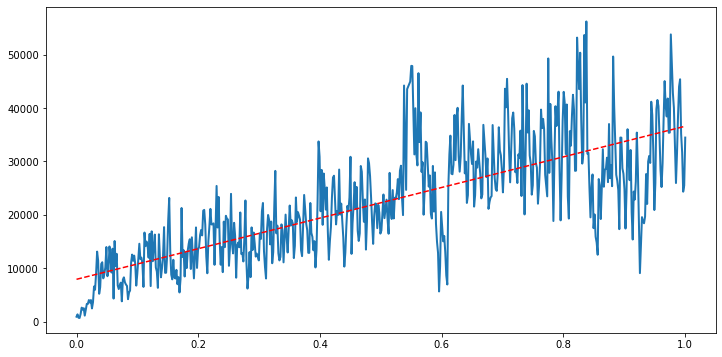

In [ ]:
# Podemos adicionar essa reta no gráfico que criamos
fig, ax = plt.subplots(figsize=(12,6))

x = venda_vlr.ajuste_data
y = venda_vlr.price

ax.plot(x, y, linewidth=2.0)

x_reta = venda_vlr.ajuste_data
y_reta = x_reta*reg.coef_[0] + reg.intercept_

ax.plot(x_reta, y_reta,'--r')

plt.show()

### <font color='blue'>Na verdade, eu quero saber qual a venda de determinados grupo</font>

In [ ]:
# Visualizando novamente a base de vendas
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


In [ ]:
# Agrupando a venda por grupo
venda_grupos = vendas.groupby(['order_purchase_timestamp','grupo'])['price'].sum().reset_index()

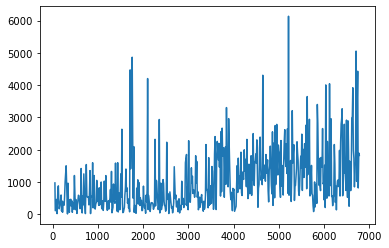

In [ ]:
# Visualizando o plot de alguns grupos
venda_grupos.loc[venda_grupos.grupo == 'carro','price'].plot();

In [ ]:
# Agrupando a venda por data e grupo
venda_grupos = vendas.groupby(['order_purchase_timestamp','grupo'])['price'].sum().reset_index()

In [ ]:
# Verificando a data máxima
venda_grupos.order_purchase_timestamp.max()

Timestamp('2018-08-20 00:00:00')

In [ ]:
# E o shape desse DataFrame
venda_grupos.shape

(6792, 3)

In [ ]:
# Podemos então separar os nossos dados em treino e teste
treino = venda_grupos[venda_grupos.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = venda_grupos[venda_grupos.order_purchase_timestamp > dt.datetime(2018,3,1)]

# Verificando o tamanho da base de treino
print(treino.shape)

# Verificando o tamanho da base de teste
print(teste.shape)

# Verificando a proporção de teste da nossa base
print(teste.shape[0]/venda_grupos.shape[0])

(4764, 3)
(2028, 3)
0.29858657243816256


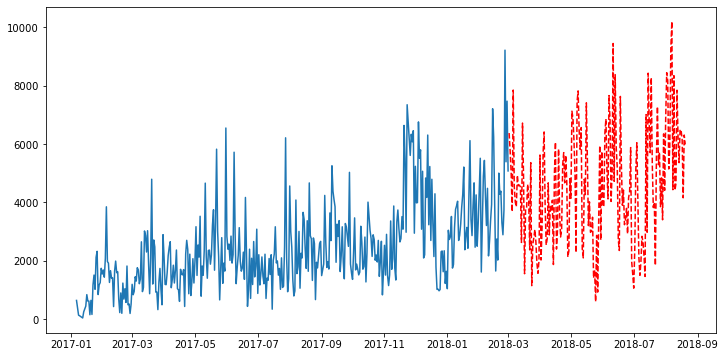

In [ ]:
# Podemos então visualizar essa base de treino e de teste
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price,'--r')

plt.show()

## Criando um modelo para estimar a venda desses pontos

In [ ]:
# Visualizando a base de treino
treino.head(3)

,order_purchase_timestamp,grupo,price
0,2017-01-06,beleza,636.00
1,2017-01-06,crianças,159.99
2,2017-01-06,games,109.90


In [ ]:
# Separando X e y
X_treino = treino[['order_purchase_timestamp','grupo']]
y_treino = treino.price

In [ ]:
# Fazendo a regressão para esses dados
reg = LinearRegression().fit(X_treino, y_treino)

TypeError: float() argument must be a string or a number, not 'Timestamp'

**O primeiro erro indica que não podemos passar um `Timestamp` para o modelo** <br>
- Vamos então fazer o tratamento de datas que já mostramos anteriormente

In [ ]:
# Utilizando o mesmo tratamento que fizemos na data
venda_grupos['ajuste_data'] = (venda_grupos.order_purchase_timestamp - venda_grupos.order_purchase_timestamp.min()).dt.days
venda_grupos['ajuste_data'] = venda_grupos['ajuste_data']/venda_grupos['ajuste_data'].max()

treino = venda_grupos[venda_grupos.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = venda_grupos[venda_grupos.order_purchase_timestamp > dt.datetime(2018,3,1)]

In [ ]:
# Novamente separando X e y
X_treino = treino[['ajuste_data','grupo']]
y_treino = treino.price

In [ ]:
# Novamente fazendo a regressão
reg = LinearRegression().fit(X_treino, y_treino)

ValueError: could not convert string to float: 'beleza'

**Já o segundo erro indica que também não podemos ter `valores em texto`** <br>
`ValueError: could not convert string to float`

- Para conseguir resolver, podemos usar o `.get_dummies()` do próprio pandas
    - https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
# Fazendo o get_dummies para a base de treino
treino = pd.concat([treino,pd.get_dummies(treino.grupo)],axis=1)

In [ ]:
# Separando X e y
X_treino = treino.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_treino = treino.price

In [ ]:
# E fazendo a regressão
reg = LinearRegression().fit(X_treino, y_treino)

In [ ]:
# Verificando o score
reg.score(X_treino, y_treino)

0.4679973262417878

In [ ]:
# o coeficiente angular
reg.coef_

array([ 2.94066119e+03, -5.54066195e+16, -5.54066195e+16, -5.54066195e+16,
       -5.54066195e+16, -5.54066195e+16, -5.54066195e+16, -5.54066195e+16,
       -5.54066195e+16, -5.54066195e+16, -5.54066195e+16, -5.54066195e+16,
       -5.54066195e+16])

In [ ]:
# e o coeficiente linear
reg.intercept_

5.540661945731856e+16

In [ ]:
# Salvando na base de treino a previsao que acabamos de fazer
treino['previsao'] = reg.predict(X_treino)

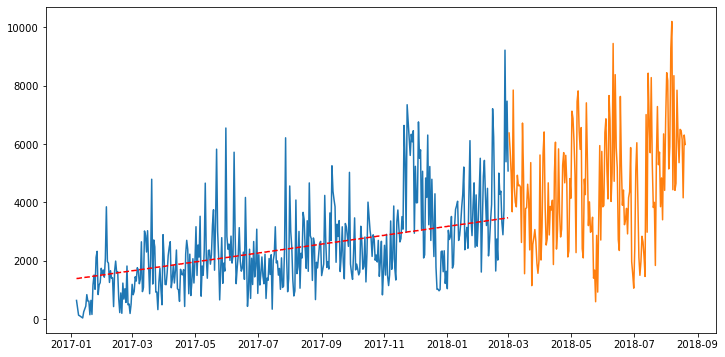

In [ ]:
# Podemos então visualizar essa base de treino e de teste
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp,base_treino.previsao,'--r')

plt.show()

### Será que meu modelo aprendeu ou apenas decorou?

In [ ]:
# Verificando a base de teste
teste.head(3)

,order_purchase_timestamp,grupo,price,ajuste_data
4764,2018-03-02,beleza,6377.81,0.71066
4765,2018-03-02,carro,730.02,0.71066
4766,2018-03-02,casa,6872.26,0.71066


In [ ]:
# E a transformação do grupo
teste = pd.concat([teste,pd.get_dummies(teste.grupo)],axis=1)

In [ ]:
# Separando X e y
X_teste = teste.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_teste = teste.price

In [ ]:
# E fazendo a previsão para a base de teste
teste['previsao'] = reg.predict(X_teste)

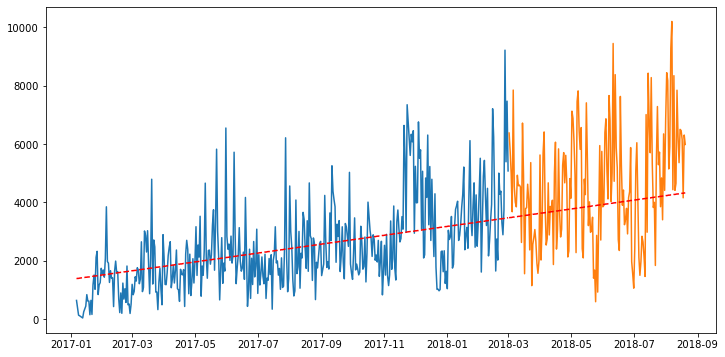

In [ ]:
# Podemos visualizar de forma gráfica essa previsão
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp,base_treino.previsao,'--r')
ax.plot(base_teste.order_purchase_timestamp,base_teste.previsao,'--r')

plt.show()

### Podemos usar qualquer um dos nossos dados, desde que tratados, para colocar no modelo

In [ ]:
# Verificando novamente a base de venda

In [ ]:
# Agora vamos utilizar as colunas mes_compra e ano_compra

In [ ]:
# Separando em treino e teste

In [ ]:
# Agora vamos criar novamente o nosso modelo

# Separando X e y para treino

# Fazendo o fit do modeo               

# Fazendo a previsão para a base de treino

# Fazendo a previsão para a base de teste

In [ ]:
# Visualizando de forma gráfica

In [ ]:
# Podemos agrupar esses valores por dia

In [ ]:
# E também visualizar graficamente

In [ ]:
# Adicionando a reta que fizemos anteriormente

## Testando a Árvore de Regressão
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Verificando a base de treino

In [ ]:
# Separando X e y de treino

In [ ]:
# Importando o DecisionTreeRegressor

In [ ]:
# Criando o nosso regressor

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Verificando o score

In [ ]:
# Fazendo a previsão pro treino e teste

In [ ]:
# Adicionando esses dados no gráfico anterior

**O próprio Scikit-Learn te ajuda a analisar os erros**
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [ ]:
# Importando o erro médio absoluto

In [ ]:
# Analisando o erro na regressao

In [ ]:
# Analisando o erro na regressao

## Agora testando o Support Vector Regression
- https://scikit-learn.org/stable/modules/svm.html#regression <br><br><br><br>

...na próxima aula!